# Notebook 5: Random Forest

This notebook will train the user data on spotify using the Random Forest model. To get a better understanding of what the data looks like, refer to Notebook 1

**Random Forest** is a Supervised Machine Learning Algorithm that is used widely in **Classification** and **Regression problems**. It builds **decision trees** on different samples and takes their majority vote for classification and average in case of regression.

![](docs/RF.png)

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV as RSCV
import seaborn as sns

In [3]:
data = pd.read_csv('processed_data.csv')

In [4]:
cols = list(data.columns)
cols.pop(0)
cols.remove('target')

In [11]:
X = data[cols]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [12]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
y_pred=model.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual User preference'], colnames=['Model prediction'])

<AxesSubplot:xlabel='Model prediction', ylabel='Actual User preference'>

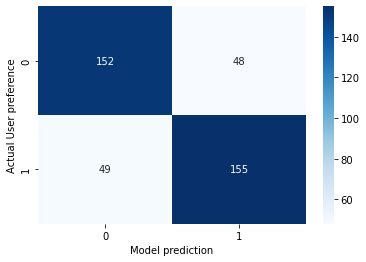

In [14]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       200
           1       0.76      0.76      0.76       204

    accuracy                           0.76       404
   macro avg       0.76      0.76      0.76       404
weighted avg       0.76      0.76      0.76       404



To determine the hyperparmeters regarding Random Forest we use : get_params()

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


### Hyperparameter Tuning

In this section we will try to find the best model by changing the hyperparameters

In [16]:
param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
model = model.best_estimator_

<AxesSubplot:xlabel='Model prediction', ylabel='Actual User preference'>

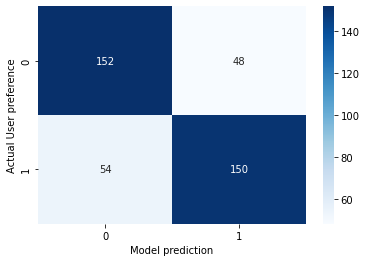

In [17]:
y_pred=model.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual User preference'], colnames=['Model prediction'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       200
           1       0.76      0.74      0.75       204

    accuracy                           0.75       404
   macro avg       0.75      0.75      0.75       404
weighted avg       0.75      0.75      0.75       404

